# Face detection application using neural network and Keras

- First we import our packages

In [1]:
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from load import load
import numpy as np
%matplotlib inline

Using TensorFlow backend.


- Loading our dataset

In [2]:
x_train, y_train, x_test, y_test, classes = load()
print(classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

['ashraf', 'joseph', 'magdy', 'ref', 'sayed', 'Shehab']
(1320, 48, 48, 3)
(1320, 1)
(330, 48, 48, 3)
(330, 1)


- Making sure that photos have arrived safely

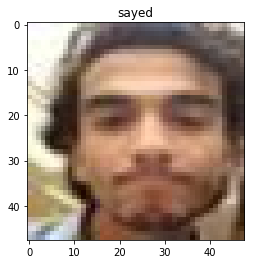

In [3]:
index = 55
plt.title(classes[y_train[index][0]])
plt.imshow((x_train[index]).astype(np.uint8))
plt.show()

- Normalizing data

In [4]:
x_train = x_train / 255
x_test = x_test / 255

- Applying one hot encoding <br>
In a brief one hot encoding is converting category which is a number in our case 
refers to the persons name to something like identity array.

In [5]:
y_train_hot = to_categorical(y_train, num_classes=6)
y_test_hot = to_categorical(y_test, num_classes=6)
print(y_train_hot.shape)
print(y_test_hot.shape)
print(y_train[0])
print(y_train_hot[0])

(1320, 6)
(330, 6)
[0]
[1. 0. 0. 0. 0. 0.]


- Building our model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


- Compiling our model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- Training our model on training data

In [8]:
model.fit(x_train, y_train_hot, epochs=50, batch_size=50)


Epoch 1/50


  50/1320 [>.............................] - ETA: 11s - loss: 1.8897 - acc: 0.1600

 150/1320 [==>...........................] - ETA: 4s - loss: 7.4941 - acc: 0.1467 

 250/1320 [====>.........................] - ETA: 2s - loss: 6.6325 - acc: 0.1600

 350/1320 [======>.......................] - ETA: 1s - loss: 5.7284 - acc: 0.1686

 450/1320 [=========>....................] - ETA: 1s - loss: 5.0708 - acc: 0.1600

 550/1320 [===========>..................] - ETA: 1s - loss: 4.5483 - acc: 0.1673

 650/1320 [=============>................] - ETA: 0s - loss: 4.1986 - acc: 0.1785

 750/1320 [================>.............] - ETA: 0s - loss: 3.8789 - acc: 0.1973

 850/1320 [==================>...........] - ETA: 0s - loss: 3.6775 - acc: 0.1882

 950/1320 [====================>.........] - ETA: 0s - loss: 3.4604 - acc: 0.1968

1050/1320 [======================>.......] - ETA: 0s - loss: 3.2898 - acc: 0.2095

1150/1320 [=========================>....] - ETA: 0s - loss: 3.1442 - acc: 0.2200

1250/1320 [===========================>..] - ETA: 0s - loss: 3.0263 - acc: 0.2264

1320/1320 [==============================] - 1s 1ms/step - loss: 2.9507 - acc: 0.2364


Epoch 2/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.6580 - acc: 0.3200

 150/1320 [==>...........................] - ETA: 0s - loss: 1.7022 - acc: 0.3333

 250/1320 [====>.........................] - ETA: 0s - loss: 1.6911 - acc: 0.3520

 350/1320 [======>.......................] - ETA: 0s - loss: 1.6226 - acc: 0.3914

 450/1320 [=========>....................] - ETA: 0s - loss: 1.6503 - acc: 0.3689

 550/1320 [===========>..................] - ETA: 0s - loss: 1.6255 - acc: 0.3636

 650/1320 [=============>................] - ETA: 0s - loss: 1.6157 - acc: 0.3600

 750/1320 [================>.............] - ETA: 0s - loss: 1.6170 - acc: 0.3480

 850/1320 [==================>...........] - ETA: 0s - loss: 1.6031 - acc: 0.3541

 950/1320 [====================>.........] - ETA: 0s - loss: 1.5888 - acc: 0.3537

1050/1320 [======================>.......] - ETA: 0s - loss: 1.5789 - acc: 0.3581

1150/1320 [=========================>....] - ETA: 0s - loss: 1.5656 - acc: 0.3617

1250/1320 [===========================>..] - ETA: 0s - loss: 1.5548 - acc: 0.3736

1320/1320 [==============================] - 1s 821us/step - loss: 1.5475 - acc: 0.3758


Epoch 3/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.5384 - acc: 0.3400

 150/1320 [==>...........................] - ETA: 0s - loss: 1.3842 - acc: 0.4067

 250/1320 [====>.........................] - ETA: 0s - loss: 1.4263 - acc: 0.4400

 350/1320 [======>.......................] - ETA: 0s - loss: 1.4733 - acc: 0.4171

 450/1320 [=========>....................] - ETA: 0s - loss: 1.4733 - acc: 0.4444

 550/1320 [===========>..................] - ETA: 0s - loss: 1.4864 - acc: 0.4509

 650/1320 [=============>................] - ETA: 0s - loss: 1.4961 - acc: 0.4492

 750/1320 [================>.............] - ETA: 0s - loss: 1.4658 - acc: 0.4627

 850/1320 [==================>...........] - ETA: 0s - loss: 1.4593 - acc: 0.4576

 950/1320 [====================>.........] - ETA: 0s - loss: 1.4524 - acc: 0.4589

1050/1320 [======================>.......] - ETA: 0s - loss: 1.4427 - acc: 0.4610

1150/1320 [=========================>....] - ETA: 0s - loss: 1.4385 - acc: 0.4609

1250/1320 [===========================>..] - ETA: 0s - loss: 1.4430 - acc: 0.4560

1320/1320 [==============================] - 1s 830us/step - loss: 1.4405 - acc: 0.4553


Epoch 4/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.5209 - acc: 0.4200

 100/1320 [=>............................] - ETA: 1s - loss: 1.4798 - acc: 0.4400

 200/1320 [===>..........................] - ETA: 1s - loss: 1.3931 - acc: 0.4650

 300/1320 [=====>........................] - ETA: 0s - loss: 1.3901 - acc: 0.4467

 400/1320 [========>.....................] - ETA: 0s - loss: 1.3294 - acc: 0.4900

 500/1320 [==========>...................] - ETA: 0s - loss: 1.3130 - acc: 0.5000

 600/1320 [============>.................] - ETA: 0s - loss: 1.3027 - acc: 0.5017

 700/1320 [==============>...............] - ETA: 0s - loss: 1.2982 - acc: 0.4957

 800/1320 [=================>............] - ETA: 0s - loss: 1.2802 - acc: 0.4962

 900/1320 [===================>..........] - ETA: 0s - loss: 1.2814 - acc: 0.4956

1000/1320 [=====================>........] - ETA: 0s - loss: 1.2930 - acc: 0.4990

1100/1320 [========================>.....] - ETA: 0s - loss: 1.2959 - acc: 0.5018

1200/1320 [==========================>...] - ETA: 0s - loss: 1.2902 - acc: 0.5025

1300/1320 [============================>.] - ETA: 0s - loss: 1.2860 - acc: 0.5062

1320/1320 [==============================] - 1s 841us/step - loss: 1.2846 - acc: 0.5068


Epoch 5/50
  50/1320 [>.............................] - ETA: 1s - loss: 1.1824 - acc: 0.5000

 150/1320 [==>...........................] - ETA: 0s - loss: 1.1285 - acc: 0.5867

 250/1320 [====>.........................] - ETA: 0s - loss: 1.2144 - acc: 0.5240

 350/1320 [======>.......................] - ETA: 0s - loss: 1.2011 - acc: 0.5457

 450/1320 [=========>....................] - ETA: 0s - loss: 1.1997 - acc: 0.5378

 550/1320 [===========>..................] - ETA: 0s - loss: 1.1962 - acc: 0.5364

 650/1320 [=============>................] - ETA: 0s - loss: 1.2040 - acc: 0.5308

 750/1320 [================>.............] - ETA: 0s - loss: 1.2075 - acc: 0.5347

 850/1320 [==================>...........] - ETA: 0s - loss: 1.2102 - acc: 0.5388

 950/1320 [====================>.........] - ETA: 0s - loss: 1.2077 - acc: 0.5432

1050/1320 [======================>.......] - ETA: 0s - loss: 1.2110 - acc: 0.5438

1150/1320 [=========================>....] - ETA: 0s - loss: 1.2059 - acc: 0.5487

1250/1320 [===========================>..] - ETA: 0s - loss: 1.1955 - acc: 0.5560

1320/1320 [==============================] - 1s 827us/step - loss: 1.1944 - acc: 0.5545


Epoch 6/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.6149 - acc: 0.3800

 150/1320 [==>...........................] - ETA: 0s - loss: 1.3433 - acc: 0.4800

 250/1320 [====>.........................] - ETA: 0s - loss: 1.3772 - acc: 0.4760

 350/1320 [======>.......................] - ETA: 0s - loss: 1.3013 - acc: 0.5200

 450/1320 [=========>....................] - ETA: 0s - loss: 1.2778 - acc: 0.5444

 550/1320 [===========>..................] - ETA: 0s - loss: 1.2623 - acc: 0.5509

 650/1320 [=============>................] - ETA: 0s - loss: 1.2516 - acc: 0.5508

 750/1320 [================>.............] - ETA: 0s - loss: 1.2237 - acc: 0.5640

 850/1320 [==================>...........] - ETA: 0s - loss: 1.1824 - acc: 0.5824

 950/1320 [====================>.........] - ETA: 0s - loss: 1.1601 - acc: 0.5884

1050/1320 [======================>.......] - ETA: 0s - loss: 1.1616 - acc: 0.5819

1150/1320 [=========================>....] - ETA: 0s - loss: 1.1482 - acc: 0.5861

1250/1320 [===========================>..] - ETA: 0s - loss: 1.1329 - acc: 0.5944

1320/1320 [==============================] - 1s 829us/step - loss: 1.1258 - acc: 0.5947


Epoch 7/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.1652 - acc: 0.5200

 150/1320 [==>...........................] - ETA: 0s - loss: 1.0664 - acc: 0.5933

 250/1320 [====>.........................] - ETA: 0s - loss: 1.0692 - acc: 0.5840

 350/1320 [======>.......................] - ETA: 0s - loss: 1.0248 - acc: 0.6057

 450/1320 [=========>....................] - ETA: 0s - loss: 1.0550 - acc: 0.6067

 550/1320 [===========>..................] - ETA: 0s - loss: 1.0320 - acc: 0.6182

 650/1320 [=============>................] - ETA: 0s - loss: 1.0139 - acc: 0.6169

 750/1320 [================>.............] - ETA: 0s - loss: 0.9953 - acc: 0.6267

 850/1320 [==================>...........] - ETA: 0s - loss: 0.9933 - acc: 0.6341

 950/1320 [====================>.........] - ETA: 0s - loss: 1.0194 - acc: 0.6242

1050/1320 [======================>.......] - ETA: 0s - loss: 1.0128 - acc: 0.6295

1150/1320 [=========================>....] - ETA: 0s - loss: 1.0140 - acc: 0.6357

1250/1320 [===========================>..] - ETA: 0s - loss: 1.0161 - acc: 0.6328

1320/1320 [==============================] - 1s 837us/step - loss: 1.0196 - acc: 0.6326


Epoch 8/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.2192 - acc: 0.5200

 150/1320 [==>...........................] - ETA: 0s - loss: 1.2825 - acc: 0.5000

 250/1320 [====>.........................] - ETA: 0s - loss: 1.2513 - acc: 0.5280

 350/1320 [======>.......................] - ETA: 0s - loss: 1.2129 - acc: 0.5571

 450/1320 [=========>....................] - ETA: 0s - loss: 1.2454 - acc: 0.5467

 550/1320 [===========>..................] - ETA: 0s - loss: 1.2006 - acc: 0.5636

 650/1320 [=============>................] - ETA: 0s - loss: 1.1703 - acc: 0.5646

 750/1320 [================>.............] - ETA: 0s - loss: 1.1935 - acc: 0.5600

 850/1320 [==================>...........] - ETA: 0s - loss: 1.1782 - acc: 0.5612

 950/1320 [====================>.........] - ETA: 0s - loss: 1.1884 - acc: 0.5558

1050/1320 [======================>.......] - ETA: 0s - loss: 1.1721 - acc: 0.5629

1150/1320 [=========================>....] - ETA: 0s - loss: 1.1590 - acc: 0.5704

1250/1320 [===========================>..] - ETA: 0s - loss: 1.1518 - acc: 0.5680

1320/1320 [==============================] - 1s 829us/step - loss: 1.1442 - acc: 0.5720


Epoch 9/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.0638 - acc: 0.6800

 150/1320 [==>...........................] - ETA: 0s - loss: 0.9335 - acc: 0.7000

 250/1320 [====>.........................] - ETA: 0s - loss: 0.9077 - acc: 0.7200

 350/1320 [======>.......................] - ETA: 0s - loss: 0.9281 - acc: 0.7029

 450/1320 [=========>....................] - ETA: 0s - loss: 0.8985 - acc: 0.7022

 550/1320 [===========>..................] - ETA: 0s - loss: 0.9326 - acc: 0.6891

 650/1320 [=============>................] - ETA: 0s - loss: 0.9741 - acc: 0.6600

 750/1320 [================>.............] - ETA: 0s - loss: 0.9908 - acc: 0.6507

 850/1320 [==================>...........] - ETA: 0s - loss: 0.9958 - acc: 0.6459

 950/1320 [====================>.........] - ETA: 0s - loss: 1.0251 - acc: 0.6305

1050/1320 [======================>.......] - ETA: 0s - loss: 1.0172 - acc: 0.6362

1150/1320 [=========================>....] - ETA: 0s - loss: 1.0131 - acc: 0.6374

1250/1320 [===========================>..] - ETA: 0s - loss: 1.0068 - acc: 0.6360

1320/1320 [==============================] - 1s 833us/step - loss: 1.0198 - acc: 0.6295


Epoch 10/50


  50/1320 [>.............................] - ETA: 1s - loss: 1.0480 - acc: 0.6200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.9409 - acc: 0.6333

 250/1320 [====>.........................] - ETA: 0s - loss: 0.9717 - acc: 0.6160

 350/1320 [======>.......................] - ETA: 0s - loss: 1.0348 - acc: 0.5971

 450/1320 [=========>....................] - ETA: 0s - loss: 1.0179 - acc: 0.6089

 550/1320 [===========>..................] - ETA: 0s - loss: 1.0506 - acc: 0.5964

 650/1320 [=============>................] - ETA: 0s - loss: 1.0602 - acc: 0.5923

 750/1320 [================>.............] - ETA: 0s - loss: 1.0297 - acc: 0.6013

 850/1320 [==================>...........] - ETA: 0s - loss: 1.0346 - acc: 0.6012

 950/1320 [====================>.........] - ETA: 0s - loss: 1.0331 - acc: 0.6021

1050/1320 [======================>.......] - ETA: 0s - loss: 1.0317 - acc: 0.6057

1150/1320 [=========================>....] - ETA: 0s - loss: 1.0266 - acc: 0.6087

1250/1320 [===========================>..] - ETA: 0s - loss: 1.0201 - acc: 0.6120

1320/1320 [==============================] - 1s 834us/step - loss: 1.0086 - acc: 0.6167


Epoch 11/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.8402 - acc: 0.7200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.8089 - acc: 0.7333

 250/1320 [====>.........................] - ETA: 0s - loss: 0.8063 - acc: 0.7120

 350/1320 [======>.......................] - ETA: 0s - loss: 0.8009 - acc: 0.7143

 450/1320 [=========>....................] - ETA: 0s - loss: 0.8130 - acc: 0.7156

 550/1320 [===========>..................] - ETA: 0s - loss: 0.8199 - acc: 0.7091

 650/1320 [=============>................] - ETA: 0s - loss: 0.8320 - acc: 0.6985

 750/1320 [================>.............] - ETA: 0s - loss: 0.8544 - acc: 0.6880

 850/1320 [==================>...........] - ETA: 0s - loss: 0.8781 - acc: 0.6729

 950/1320 [====================>.........] - ETA: 0s - loss: 0.8838 - acc: 0.6695

1050/1320 [======================>.......] - ETA: 0s - loss: 0.9112 - acc: 0.6562

1150/1320 [=========================>....] - ETA: 0s - loss: 0.9206 - acc: 0.6557

1250/1320 [===========================>..] - ETA: 0s - loss: 0.9298 - acc: 0.6552

1320/1320 [==============================] - 1s 832us/step - loss: 0.9265 - acc: 0.6568


Epoch 12/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.8312 - acc: 0.6200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.8652 - acc: 0.6600

 250/1320 [====>.........................] - ETA: 0s - loss: 0.9396 - acc: 0.6320

 350/1320 [======>.......................] - ETA: 0s - loss: 0.9439 - acc: 0.6486

 450/1320 [=========>....................] - ETA: 0s - loss: 0.9483 - acc: 0.6489

 550/1320 [===========>..................] - ETA: 0s - loss: 0.9208 - acc: 0.6509

 650/1320 [=============>................] - ETA: 0s - loss: 0.9231 - acc: 0.6523

 750/1320 [================>.............] - ETA: 0s - loss: 0.9154 - acc: 0.6533

 850/1320 [==================>...........] - ETA: 0s - loss: 0.9429 - acc: 0.6471

 950/1320 [====================>.........] - ETA: 0s - loss: 0.9346 - acc: 0.6516

1050/1320 [======================>.......] - ETA: 0s - loss: 0.9496 - acc: 0.6438

1150/1320 [=========================>....] - ETA: 0s - loss: 0.9486 - acc: 0.6426

1250/1320 [===========================>..] - ETA: 0s - loss: 0.9419 - acc: 0.6432

1320/1320 [==============================] - 1s 871us/step - loss: 0.9453 - acc: 0.6432


Epoch 13/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.9085 - acc: 0.6600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.8739 - acc: 0.7067

 250/1320 [====>.........................] - ETA: 0s - loss: 0.9455 - acc: 0.6720

 350/1320 [======>.......................] - ETA: 0s - loss: 0.9249 - acc: 0.6714

 450/1320 [=========>....................] - ETA: 0s - loss: 0.8870 - acc: 0.6778

 550/1320 [===========>..................] - ETA: 0s - loss: 0.8948 - acc: 0.6727

 650/1320 [=============>................] - ETA: 0s - loss: 0.8875 - acc: 0.6692

 750/1320 [================>.............] - ETA: 0s - loss: 0.8825 - acc: 0.6667

 850/1320 [==================>...........] - ETA: 0s - loss: 0.8808 - acc: 0.6706

 950/1320 [====================>.........] - ETA: 0s - loss: 0.8613 - acc: 0.6821

1050/1320 [======================>.......] - ETA: 0s - loss: 0.8682 - acc: 0.6829

1150/1320 [=========================>....] - ETA: 0s - loss: 0.8582 - acc: 0.6843

1250/1320 [===========================>..] - ETA: 0s - loss: 0.8515 - acc: 0.6848

1320/1320 [==============================] - 1s 834us/step - loss: 0.8587 - acc: 0.6818


Epoch 14/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.7999 - acc: 0.7400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.8001 - acc: 0.7267

 250/1320 [====>.........................] - ETA: 0s - loss: 0.8016 - acc: 0.7160

 350/1320 [======>.......................] - ETA: 0s - loss: 0.8061 - acc: 0.7286

 450/1320 [=========>....................] - ETA: 0s - loss: 0.7787 - acc: 0.7400

 550/1320 [===========>..................] - ETA: 0s - loss: 0.7740 - acc: 0.7364

 650/1320 [=============>................] - ETA: 0s - loss: 0.7766 - acc: 0.7369

 750/1320 [================>.............] - ETA: 0s - loss: 0.7797 - acc: 0.7360

 850/1320 [==================>...........] - ETA: 0s - loss: 0.7713 - acc: 0.7365

 950/1320 [====================>.........] - ETA: 0s - loss: 0.7775 - acc: 0.7295

1050/1320 [======================>.......] - ETA: 0s - loss: 0.7708 - acc: 0.7305

1150/1320 [=========================>....] - ETA: 0s - loss: 0.7650 - acc: 0.7313

1250/1320 [===========================>..] - ETA: 0s - loss: 0.7690 - acc: 0.7288

1320/1320 [==============================] - 1s 850us/step - loss: 0.7668 - acc: 0.7295


Epoch 15/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.5134 - acc: 0.8400

 150/1320 [==>...........................] - ETA: 1s - loss: 0.6121 - acc: 0.7800

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5736 - acc: 0.7960

 300/1320 [=====>........................] - ETA: 0s - loss: 0.5856 - acc: 0.7867

 400/1320 [========>.....................] - ETA: 0s - loss: 0.6252 - acc: 0.7725

 500/1320 [==========>...................] - ETA: 0s - loss: 0.6237 - acc: 0.7700

 600/1320 [============>.................] - ETA: 0s - loss: 0.6423 - acc: 0.7683

 700/1320 [==============>...............] - ETA: 0s - loss: 0.6344 - acc: 0.7686

 800/1320 [=================>............] - ETA: 0s - loss: 0.6476 - acc: 0.7687

 900/1320 [===================>..........] - ETA: 0s - loss: 0.6668 - acc: 0.7644

1000/1320 [=====================>........] - ETA: 0s - loss: 0.6786 - acc: 0.7610

1100/1320 [========================>.....] - ETA: 0s - loss: 0.6824 - acc: 0.7600

1200/1320 [==========================>...] - ETA: 0s - loss: 0.6988 - acc: 0.7533

1300/1320 [============================>.] - ETA: 0s - loss: 0.6981 - acc: 0.7531

1320/1320 [==============================] - 1s 872us/step - loss: 0.7041 - acc: 0.7492


Epoch 16/50
  50/1320 [>.............................] - ETA: 1s - loss: 0.4923 - acc: 0.7400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.7619 - acc: 0.7067

 250/1320 [====>.........................] - ETA: 0s - loss: 0.6690 - acc: 0.7600

 350/1320 [======>.......................] - ETA: 0s - loss: 0.7321 - acc: 0.7486

 450/1320 [=========>....................] - ETA: 0s - loss: 0.7087 - acc: 0.7556

 550/1320 [===========>..................] - ETA: 0s - loss: 0.7022 - acc: 0.7564

 650/1320 [=============>................] - ETA: 0s - loss: 0.6951 - acc: 0.7492

 750/1320 [================>.............] - ETA: 0s - loss: 0.7069 - acc: 0.7467

 850/1320 [==================>...........] - ETA: 0s - loss: 0.6992 - acc: 0.7529

 950/1320 [====================>.........] - ETA: 0s - loss: 0.6992 - acc: 0.7516

1050/1320 [======================>.......] - ETA: 0s - loss: 0.6871 - acc: 0.7571

1150/1320 [=========================>....] - ETA: 0s - loss: 0.6830 - acc: 0.7583

1250/1320 [===========================>..] - ETA: 0s - loss: 0.6783 - acc: 0.7552

1320/1320 [==============================] - 1s 825us/step - loss: 0.6786 - acc: 0.7553


Epoch 17/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.6962 - acc: 0.7000

 150/1320 [==>...........................] - ETA: 0s - loss: 0.6867 - acc: 0.7400

 250/1320 [====>.........................] - ETA: 0s - loss: 0.7182 - acc: 0.7240

 350/1320 [======>.......................] - ETA: 0s - loss: 0.6988 - acc: 0.7314

 450/1320 [=========>....................] - ETA: 0s - loss: 0.6801 - acc: 0.7467

 550/1320 [===========>..................] - ETA: 0s - loss: 0.7029 - acc: 0.7382

 650/1320 [=============>................] - ETA: 0s - loss: 0.6807 - acc: 0.7446

 750/1320 [================>.............] - ETA: 0s - loss: 0.6881 - acc: 0.7413

 850/1320 [==================>...........] - ETA: 0s - loss: 0.6952 - acc: 0.7447

 950/1320 [====================>.........] - ETA: 0s - loss: 0.6695 - acc: 0.7589

1050/1320 [======================>.......] - ETA: 0s - loss: 0.6697 - acc: 0.7533

1150/1320 [=========================>....] - ETA: 0s - loss: 0.6649 - acc: 0.7539

1250/1320 [===========================>..] - ETA: 0s - loss: 0.6654 - acc: 0.7512

1320/1320 [==============================] - 1s 836us/step - loss: 0.6610 - acc: 0.7538


Epoch 18/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.4059 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.5019 - acc: 0.8200

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5270 - acc: 0.8080

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5320 - acc: 0.8086

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5492 - acc: 0.8000

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5620 - acc: 0.8000

 650/1320 [=============>................] - ETA: 0s - loss: 0.5587 - acc: 0.8031

 750/1320 [================>.............] - ETA: 0s - loss: 0.5375 - acc: 0.8133

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5299 - acc: 0.8188

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5378 - acc: 0.8105

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5563 - acc: 0.8057

1150/1320 [=========================>....] - ETA: 0s - loss: 0.5700 - acc: 0.7965

1250/1320 [===========================>..] - ETA: 0s - loss: 0.5783 - acc: 0.7960

1320/1320 [==============================] - 1s 824us/step - loss: 0.5814 - acc: 0.7962


Epoch 19/50
  50/1320 [>.............................] - ETA: 1s - loss: 0.5754 - acc: 0.7600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.5201 - acc: 0.8000

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5488 - acc: 0.7960

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5789 - acc: 0.7914

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5615 - acc: 0.8000

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5684 - acc: 0.8018

 650/1320 [=============>................] - ETA: 0s - loss: 0.5553 - acc: 0.8138

 750/1320 [================>.............] - ETA: 0s - loss: 0.5608 - acc: 0.8093

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5626 - acc: 0.8059

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5644 - acc: 0.8063

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5687 - acc: 0.8038

1150/1320 [=========================>....] - ETA: 0s - loss: 0.5657 - acc: 0.8043

1250/1320 [===========================>..] - ETA: 0s - loss: 0.5720 - acc: 0.8032

1320/1320 [==============================] - 1s 833us/step - loss: 0.5663 - acc: 0.8045


Epoch 20/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.5697 - acc: 0.7800

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4998 - acc: 0.8067

 250/1320 [====>.........................] - ETA: 0s - loss: 0.4824 - acc: 0.8160

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5408 - acc: 0.7971

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5198 - acc: 0.8044

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5327 - acc: 0.7927

 650/1320 [=============>................] - ETA: 0s - loss: 0.5419 - acc: 0.7892

 750/1320 [================>.............] - ETA: 0s - loss: 0.5366 - acc: 0.8000

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5340 - acc: 0.7965

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5413 - acc: 0.7947

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5275 - acc: 0.7981

1150/1320 [=========================>....] - ETA: 0s - loss: 0.5314 - acc: 0.7983

1250/1320 [===========================>..] - ETA: 0s - loss: 0.5423 - acc: 0.7944

1320/1320 [==============================] - 1s 833us/step - loss: 0.5378 - acc: 0.7962


Epoch 21/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.4477 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4671 - acc: 0.8400

 250/1320 [====>.........................] - ETA: 0s - loss: 0.4871 - acc: 0.8320

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5133 - acc: 0.8086

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5405 - acc: 0.7911

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5224 - acc: 0.8018

 650/1320 [=============>................] - ETA: 0s - loss: 0.4989 - acc: 0.8154

 750/1320 [================>.............] - ETA: 0s - loss: 0.5141 - acc: 0.8120

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5190 - acc: 0.8082

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5274 - acc: 0.8074

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5199 - acc: 0.8086

1150/1320 [=========================>....] - ETA: 0s - loss: 0.5106 - acc: 0.8130

1250/1320 [===========================>..] - ETA: 0s - loss: 0.5145 - acc: 0.8104

1320/1320 [==============================] - 1s 842us/step - loss: 0.5065 - acc: 0.8136


Epoch 22/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.4729 - acc: 0.8400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3930 - acc: 0.8600

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3946 - acc: 0.8600

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3933 - acc: 0.8600

 450/1320 [=========>....................] - ETA: 0s - loss: 0.3958 - acc: 0.8600

 550/1320 [===========>..................] - ETA: 0s - loss: 0.3958 - acc: 0.8582

 650/1320 [=============>................] - ETA: 0s - loss: 0.4086 - acc: 0.8585

 750/1320 [================>.............] - ETA: 0s - loss: 0.4245 - acc: 0.8560

 850/1320 [==================>...........] - ETA: 0s - loss: 0.4348 - acc: 0.8518

 950/1320 [====================>.........] - ETA: 0s - loss: 0.4427 - acc: 0.8463

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4354 - acc: 0.8495

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4519 - acc: 0.8417

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4556 - acc: 0.8424

1320/1320 [==============================] - 1s 836us/step - loss: 0.4584 - acc: 0.8424


Epoch 23/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.4865 - acc: 0.8400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.5656 - acc: 0.8133

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5342 - acc: 0.8280

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5568 - acc: 0.8143

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5399 - acc: 0.8222

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5554 - acc: 0.8218

 650/1320 [=============>................] - ETA: 0s - loss: 0.5217 - acc: 0.8323

 750/1320 [================>.............] - ETA: 0s - loss: 0.5200 - acc: 0.8293

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5113 - acc: 0.8318

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5111 - acc: 0.8326

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5078 - acc: 0.8333

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4997 - acc: 0.8339

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4915 - acc: 0.8368

1320/1320 [==============================] - 1s 829us/step - loss: 0.4916 - acc: 0.8356


Epoch 24/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.4793 - acc: 0.8000

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4911 - acc: 0.7933

 250/1320 [====>.........................] - ETA: 0s - loss: 0.4834 - acc: 0.8000

 350/1320 [======>.......................] - ETA: 0s - loss: 0.4652 - acc: 0.8229

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4564 - acc: 0.8244

 550/1320 [===========>..................] - ETA: 0s - loss: 0.4438 - acc: 0.8291

 650/1320 [=============>................] - ETA: 0s - loss: 0.4420 - acc: 0.8308

 750/1320 [================>.............] - ETA: 0s - loss: 0.4396 - acc: 0.8333

 850/1320 [==================>...........] - ETA: 0s - loss: 0.4382 - acc: 0.8376

 950/1320 [====================>.........] - ETA: 0s - loss: 0.4538 - acc: 0.8305

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4585 - acc: 0.8305

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4478 - acc: 0.8365

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4399 - acc: 0.8424

1320/1320 [==============================] - 1s 829us/step - loss: 0.4396 - acc: 0.8432


Epoch 25/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2861 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3895 - acc: 0.8333

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3391 - acc: 0.8720

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3927 - acc: 0.8514

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4065 - acc: 0.8489

 550/1320 [===========>..................] - ETA: 0s - loss: 0.3903 - acc: 0.8600

 650/1320 [=============>................] - ETA: 0s - loss: 0.3803 - acc: 0.8662

 750/1320 [================>.............] - ETA: 0s - loss: 0.3785 - acc: 0.8680

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3674 - acc: 0.8729

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3775 - acc: 0.8684

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4017 - acc: 0.8600

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4326 - acc: 0.8496

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4311 - acc: 0.8504

1320/1320 [==============================] - 1s 832us/step - loss: 0.4378 - acc: 0.8500


Epoch 26/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2853 - acc: 0.9000

 150/1320 [==>...........................] - ETA: 0s - loss: 0.5217 - acc: 0.8067

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5514 - acc: 0.8000

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5458 - acc: 0.8029

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5408 - acc: 0.8111

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5259 - acc: 0.8182

 650/1320 [=============>................] - ETA: 0s - loss: 0.5306 - acc: 0.8185

 750/1320 [================>.............] - ETA: 0s - loss: 0.5219 - acc: 0.8173

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5432 - acc: 0.8071

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5473 - acc: 0.8021

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5386 - acc: 0.8095

1150/1320 [=========================>....] - ETA: 0s - loss: 0.5270 - acc: 0.8165

1250/1320 [===========================>..] - ETA: 0s - loss: 0.5210 - acc: 0.8208

1320/1320 [==============================] - 1s 831us/step - loss: 0.5195 - acc: 0.8220


Epoch 27/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2908 - acc: 0.9000

 150/1320 [==>...........................] - ETA: 1s - loss: 0.4576 - acc: 0.8400

 250/1320 [====>.........................] - ETA: 0s - loss: 0.4319 - acc: 0.8560

 350/1320 [======>.......................] - ETA: 0s - loss: 0.4315 - acc: 0.8514

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4290 - acc: 0.8578

 550/1320 [===========>..................] - ETA: 0s - loss: 0.4484 - acc: 0.8436

 650/1320 [=============>................] - ETA: 0s - loss: 0.4367 - acc: 0.8477

 750/1320 [================>.............] - ETA: 0s - loss: 0.4449 - acc: 0.8440

 850/1320 [==================>...........] - ETA: 0s - loss: 0.4314 - acc: 0.8518

 950/1320 [====================>.........] - ETA: 0s - loss: 0.4319 - acc: 0.8516

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4300 - acc: 0.8524

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4197 - acc: 0.8548

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4212 - acc: 0.8512

1320/1320 [==============================] - 1s 854us/step - loss: 0.4261 - acc: 0.8515


Epoch 28/50
  50/1320 [>.............................] - ETA: 1s - loss: 0.4915 - acc: 0.8400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4452 - acc: 0.8600

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5479 - acc: 0.8160

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5434 - acc: 0.8086

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5384 - acc: 0.8111

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5196 - acc: 0.8073

 650/1320 [=============>................] - ETA: 0s - loss: 0.5011 - acc: 0.8108

 750/1320 [================>.............] - ETA: 0s - loss: 0.5116 - acc: 0.8080

 850/1320 [==================>...........] - ETA: 0s - loss: 0.4984 - acc: 0.8071

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5008 - acc: 0.8074

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4864 - acc: 0.8105

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4764 - acc: 0.8174

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4728 - acc: 0.8168

1320/1320 [==============================] - 1s 828us/step - loss: 0.4725 - acc: 0.8182


Epoch 29/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2887 - acc: 0.9000

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3061 - acc: 0.8800

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3145 - acc: 0.8800

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3568 - acc: 0.8657

 450/1320 [=========>....................] - ETA: 0s - loss: 0.3468 - acc: 0.8689

 550/1320 [===========>..................] - ETA: 0s - loss: 0.3570 - acc: 0.8727

 650/1320 [=============>................] - ETA: 0s - loss: 0.3657 - acc: 0.8708

 750/1320 [================>.............] - ETA: 0s - loss: 0.3717 - acc: 0.8693

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3734 - acc: 0.8671

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3738 - acc: 0.8705

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4053 - acc: 0.8581

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4236 - acc: 0.8539

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4296 - acc: 0.8504

1320/1320 [==============================] - 1s 836us/step - loss: 0.4316 - acc: 0.8492


Epoch 30/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.6049 - acc: 0.7800

 150/1320 [==>...........................] - ETA: 0s - loss: 0.5728 - acc: 0.7600

 250/1320 [====>.........................] - ETA: 0s - loss: 0.5753 - acc: 0.7760

 350/1320 [======>.......................] - ETA: 0s - loss: 0.5782 - acc: 0.7686

 450/1320 [=========>....................] - ETA: 0s - loss: 0.5542 - acc: 0.7889

 550/1320 [===========>..................] - ETA: 0s - loss: 0.5284 - acc: 0.8055

 650/1320 [=============>................] - ETA: 0s - loss: 0.5522 - acc: 0.8000

 750/1320 [================>.............] - ETA: 0s - loss: 0.5459 - acc: 0.7960

 850/1320 [==================>...........] - ETA: 0s - loss: 0.5424 - acc: 0.8024

 950/1320 [====================>.........] - ETA: 0s - loss: 0.5106 - acc: 0.8158

1050/1320 [======================>.......] - ETA: 0s - loss: 0.5000 - acc: 0.8200

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4908 - acc: 0.8217

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4831 - acc: 0.8224

1320/1320 [==============================] - 1s 834us/step - loss: 0.4685 - acc: 0.8280


Epoch 31/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.3642 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4104 - acc: 0.8400

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3369 - acc: 0.8760

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3596 - acc: 0.8714

 450/1320 [=========>....................] - ETA: 0s - loss: 0.3727 - acc: 0.8644

 550/1320 [===========>..................] - ETA: 0s - loss: 0.3693 - acc: 0.8636

 650/1320 [=============>................] - ETA: 0s - loss: 0.3803 - acc: 0.8631

 750/1320 [================>.............] - ETA: 0s - loss: 0.3815 - acc: 0.8613

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3739 - acc: 0.8659

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3551 - acc: 0.8747

1050/1320 [======================>.......] - ETA: 0s - loss: 0.3622 - acc: 0.8743

1150/1320 [=========================>....] - ETA: 0s - loss: 0.3607 - acc: 0.8739

1250/1320 [===========================>..] - ETA: 0s - loss: 0.3591 - acc: 0.8728

1320/1320 [==============================] - 1s 839us/step - loss: 0.3664 - acc: 0.8674


Epoch 32/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2354 - acc: 0.9200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.2435 - acc: 0.9200

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2984 - acc: 0.9040

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3107 - acc: 0.8943

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2826 - acc: 0.9067

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2803 - acc: 0.9109

 650/1320 [=============>................] - ETA: 0s - loss: 0.2789 - acc: 0.9108

 750/1320 [================>.............] - ETA: 0s - loss: 0.2668 - acc: 0.9120

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2656 - acc: 0.9153

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2552 - acc: 0.9189

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2540 - acc: 0.9200

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2548 - acc: 0.9174

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2681 - acc: 0.9144

1320/1320 [==============================] - 1s 834us/step - loss: 0.2713 - acc: 0.9136


Epoch 33/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1735 - acc: 0.9200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3441 - acc: 0.8800

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3214 - acc: 0.8760

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3505 - acc: 0.8629

 450/1320 [=========>....................] - ETA: 0s - loss: 0.3556 - acc: 0.8622

 550/1320 [===========>..................] - ETA: 0s - loss: 0.3603 - acc: 0.8636

 650/1320 [=============>................] - ETA: 0s - loss: 0.3608 - acc: 0.8631

 750/1320 [================>.............] - ETA: 0s - loss: 0.3541 - acc: 0.8680

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3384 - acc: 0.8776

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3488 - acc: 0.8737

1050/1320 [======================>.......] - ETA: 0s - loss: 0.3433 - acc: 0.8743

1150/1320 [=========================>....] - ETA: 0s - loss: 0.3556 - acc: 0.8670

1250/1320 [===========================>..] - ETA: 0s - loss: 0.3535 - acc: 0.8672

1320/1320 [==============================] - 1s 836us/step - loss: 0.3547 - acc: 0.8659


Epoch 34/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.3088 - acc: 0.8800

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3517 - acc: 0.8467

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3446 - acc: 0.8560

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3875 - acc: 0.8514

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4358 - acc: 0.8422

 550/1320 [===========>..................] - ETA: 0s - loss: 0.4569 - acc: 0.8345

 650/1320 [=============>................] - ETA: 0s - loss: 0.4724 - acc: 0.8369

 750/1320 [================>.............] - ETA: 0s - loss: 0.4864 - acc: 0.8347

 850/1320 [==================>...........] - ETA: 0s - loss: 0.4777 - acc: 0.8388

 950/1320 [====================>.........] - ETA: 0s - loss: 0.4647 - acc: 0.8442

1050/1320 [======================>.......] - ETA: 0s - loss: 0.4513 - acc: 0.8476

1150/1320 [=========================>....] - ETA: 0s - loss: 0.4447 - acc: 0.8504

1250/1320 [===========================>..] - ETA: 0s - loss: 0.4372 - acc: 0.8528

1320/1320 [==============================] - 1s 841us/step - loss: 0.4269 - acc: 0.8568


Epoch 35/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2944 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.2076 - acc: 0.9400

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2389 - acc: 0.9360

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2254 - acc: 0.9429

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2391 - acc: 0.9422

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2416 - acc: 0.9364

 650/1320 [=============>................] - ETA: 0s - loss: 0.2378 - acc: 0.9338

 750/1320 [================>.............] - ETA: 0s - loss: 0.2399 - acc: 0.9333

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2336 - acc: 0.9329

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2489 - acc: 0.9263

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2489 - acc: 0.9267

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2501 - acc: 0.9252

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2485 - acc: 0.9248

1320/1320 [==============================] - 1s 844us/step - loss: 0.2499 - acc: 0.9250


Epoch 36/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1593 - acc: 0.9600

 150/1320 [==>...........................] - ETA: 1s - loss: 0.3095 - acc: 0.9000

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3193 - acc: 0.8840

 350/1320 [======>.......................] - ETA: 0s - loss: 0.3412 - acc: 0.8743

 450/1320 [=========>....................] - ETA: 0s - loss: 0.3054 - acc: 0.8933

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2928 - acc: 0.8964

 650/1320 [=============>................] - ETA: 0s - loss: 0.3191 - acc: 0.8892

 750/1320 [================>.............] - ETA: 0s - loss: 0.2998 - acc: 0.8987

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3106 - acc: 0.8929

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2996 - acc: 0.8989

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2943 - acc: 0.9019

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2944 - acc: 0.9000

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2862 - acc: 0.9032

1320/1320 [==============================] - 1s 848us/step - loss: 0.2869 - acc: 0.9030


Epoch 37/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1070 - acc: 0.9800

 150/1320 [==>...........................] - ETA: 1s - loss: 0.2135 - acc: 0.9333

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2534 - acc: 0.9240

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2453 - acc: 0.9229

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2412 - acc: 0.9222

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2407 - acc: 0.9218

 650/1320 [=============>................] - ETA: 0s - loss: 0.2318 - acc: 0.9246

 750/1320 [================>.............] - ETA: 0s - loss: 0.2313 - acc: 0.9227

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2342 - acc: 0.9235

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2305 - acc: 0.9263

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2341 - acc: 0.9257

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2273 - acc: 0.9278

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2210 - acc: 0.9304

1320/1320 [==============================] - 1s 842us/step - loss: 0.2191 - acc: 0.9318


Epoch 38/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.0812 - acc: 0.9800

 150/1320 [==>...........................] - ETA: 1s - loss: 0.1786 - acc: 0.9267

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1934 - acc: 0.9280

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2169 - acc: 0.9171

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2044 - acc: 0.9267

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2374 - acc: 0.9145

 650/1320 [=============>................] - ETA: 0s - loss: 0.2341 - acc: 0.9169

 750/1320 [================>.............] - ETA: 0s - loss: 0.2318 - acc: 0.9173

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2238 - acc: 0.9212

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2191 - acc: 0.9242

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2144 - acc: 0.9238

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2127 - acc: 0.9261

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2251 - acc: 0.9200

1320/1320 [==============================] - 1s 842us/step - loss: 0.2206 - acc: 0.9227


Epoch 39/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2722 - acc: 0.9200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.3645 - acc: 0.8733

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2735 - acc: 0.9080

 350/1320 [======>.......................] - ETA: 0s - loss: 0.4079 - acc: 0.8686

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4127 - acc: 0.8600

 550/1320 [===========>..................] - ETA: 0s - loss: 0.4135 - acc: 0.8618

 650/1320 [=============>................] - ETA: 0s - loss: 0.3987 - acc: 0.8615

 750/1320 [================>.............] - ETA: 0s - loss: 0.3959 - acc: 0.8640

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3897 - acc: 0.8682

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3905 - acc: 0.8663

1050/1320 [======================>.......] - ETA: 0s - loss: 0.3775 - acc: 0.8705

1150/1320 [=========================>....] - ETA: 0s - loss: 0.3814 - acc: 0.8670

1250/1320 [===========================>..] - ETA: 0s - loss: 0.3715 - acc: 0.8680

1320/1320 [==============================] - 1s 841us/step - loss: 0.3669 - acc: 0.8689


Epoch 40/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1970 - acc: 0.9400

 150/1320 [==>...........................] - ETA: 0s - loss: 0.2192 - acc: 0.9267

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2002 - acc: 0.9320

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2126 - acc: 0.9286

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2012 - acc: 0.9356

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2141 - acc: 0.9273

 650/1320 [=============>................] - ETA: 0s - loss: 0.2054 - acc: 0.9308

 750/1320 [================>.............] - ETA: 0s - loss: 0.1950 - acc: 0.9360

 850/1320 [==================>...........] - ETA: 0s - loss: 0.1838 - acc: 0.9424

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1854 - acc: 0.9421

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1813 - acc: 0.9419

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1850 - acc: 0.9426

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1873 - acc: 0.9440

1320/1320 [==============================] - 1s 838us/step - loss: 0.1874 - acc: 0.9439


Epoch 41/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1306 - acc: 0.9600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.1662 - acc: 0.9533

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1939 - acc: 0.9360

 350/1320 [======>.......................] - ETA: 0s - loss: 0.1889 - acc: 0.9343

 450/1320 [=========>....................] - ETA: 0s - loss: 0.1721 - acc: 0.9400

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2019 - acc: 0.9291

 650/1320 [=============>................] - ETA: 0s - loss: 0.2110 - acc: 0.9277

 750/1320 [================>.............] - ETA: 0s - loss: 0.2204 - acc: 0.9213

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2340 - acc: 0.9129

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2297 - acc: 0.9137

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2459 - acc: 0.9105

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2514 - acc: 0.9104

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2598 - acc: 0.9096

1320/1320 [==============================] - 1s 855us/step - loss: 0.2675 - acc: 0.9045


Epoch 42/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1712 - acc: 0.9200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.2923 - acc: 0.8800

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2661 - acc: 0.8960

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2823 - acc: 0.8857

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2830 - acc: 0.8822

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2878 - acc: 0.8800

 650/1320 [=============>................] - ETA: 0s - loss: 0.2977 - acc: 0.8785

 750/1320 [================>.............] - ETA: 0s - loss: 0.2796 - acc: 0.8920

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2838 - acc: 0.8871

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2703 - acc: 0.8947

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2784 - acc: 0.8905

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2765 - acc: 0.8904

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2675 - acc: 0.8952

1320/1320 [==============================] - 1s 844us/step - loss: 0.2720 - acc: 0.8947


Epoch 43/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1245 - acc: 0.9800

 150/1320 [==>...........................] - ETA: 0s - loss: 0.2888 - acc: 0.9200

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2881 - acc: 0.9120

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2608 - acc: 0.9200

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2717 - acc: 0.9178

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2527 - acc: 0.9218

 650/1320 [=============>................] - ETA: 0s - loss: 0.2566 - acc: 0.9215

 750/1320 [================>.............] - ETA: 0s - loss: 0.2363 - acc: 0.9293

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2332 - acc: 0.9282

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2255 - acc: 0.9316

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2362 - acc: 0.9276

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2462 - acc: 0.9252

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2370 - acc: 0.9288

1320/1320 [==============================] - 1s 844us/step - loss: 0.2431 - acc: 0.9265


Epoch 44/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.0521 - acc: 1.0000

 150/1320 [==>...........................] - ETA: 1s - loss: 0.1729 - acc: 0.9467

 250/1320 [====>.........................] - ETA: 0s - loss: 0.2119 - acc: 0.9200

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2147 - acc: 0.9200

 450/1320 [=========>....................] - ETA: 0s - loss: 0.2190 - acc: 0.9156

 550/1320 [===========>..................] - ETA: 0s - loss: 0.2023 - acc: 0.9291

 650/1320 [=============>................] - ETA: 0s - loss: 0.2225 - acc: 0.9200

 750/1320 [================>.............] - ETA: 0s - loss: 0.2147 - acc: 0.9240

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2180 - acc: 0.9200

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2258 - acc: 0.9158

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2232 - acc: 0.9190

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2217 - acc: 0.9217

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2162 - acc: 0.9240

1320/1320 [==============================] - 1s 849us/step - loss: 0.2115 - acc: 0.9265


Epoch 45/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.2351 - acc: 0.8600

 150/1320 [==>...........................] - ETA: 1s - loss: 0.1900 - acc: 0.9067

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1779 - acc: 0.9200

 350/1320 [======>.......................] - ETA: 0s - loss: 0.1594 - acc: 0.9343

 450/1320 [=========>....................] - ETA: 0s - loss: 0.1687 - acc: 0.9333

 550/1320 [===========>..................] - ETA: 0s - loss: 0.1778 - acc: 0.9327

 650/1320 [=============>................] - ETA: 0s - loss: 0.2132 - acc: 0.9200

 750/1320 [================>.............] - ETA: 0s - loss: 0.2178 - acc: 0.9187

 850/1320 [==================>...........] - ETA: 0s - loss: 0.2463 - acc: 0.9129

 950/1320 [====================>.........] - ETA: 0s - loss: 0.2530 - acc: 0.9095

1050/1320 [======================>.......] - ETA: 0s - loss: 0.2681 - acc: 0.9019

1150/1320 [=========================>....] - ETA: 0s - loss: 0.2997 - acc: 0.8922

1250/1320 [===========================>..] - ETA: 0s - loss: 0.2928 - acc: 0.8960

1320/1320 [==============================] - 1s 853us/step - loss: 0.3041 - acc: 0.8939


Epoch 46/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.6604 - acc: 0.8200

 150/1320 [==>...........................] - ETA: 0s - loss: 0.4330 - acc: 0.8667

 250/1320 [====>.........................] - ETA: 0s - loss: 0.3923 - acc: 0.8720

 350/1320 [======>.......................] - ETA: 0s - loss: 0.4433 - acc: 0.8514

 450/1320 [=========>....................] - ETA: 0s - loss: 0.4442 - acc: 0.8556

 550/1320 [===========>..................] - ETA: 0s - loss: 0.4328 - acc: 0.8618

 650/1320 [=============>................] - ETA: 0s - loss: 0.4012 - acc: 0.8677

 750/1320 [================>.............] - ETA: 0s - loss: 0.3955 - acc: 0.8693

 850/1320 [==================>...........] - ETA: 0s - loss: 0.3886 - acc: 0.8671

 950/1320 [====================>.........] - ETA: 0s - loss: 0.3995 - acc: 0.8663

1050/1320 [======================>.......] - ETA: 0s - loss: 0.3799 - acc: 0.8752

1150/1320 [=========================>....] - ETA: 0s - loss: 0.3660 - acc: 0.8791

1250/1320 [===========================>..] - ETA: 0s - loss: 0.3476 - acc: 0.8856

1320/1320 [==============================] - 1s 833us/step - loss: 0.3447 - acc: 0.8871


Epoch 47/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1881 - acc: 0.9000

 150/1320 [==>...........................] - ETA: 0s - loss: 0.1908 - acc: 0.9333

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1667 - acc: 0.9480

 350/1320 [======>.......................] - ETA: 0s - loss: 0.2025 - acc: 0.9314

 450/1320 [=========>....................] - ETA: 0s - loss: 0.1792 - acc: 0.9444

 550/1320 [===========>..................] - ETA: 0s - loss: 0.1906 - acc: 0.9400

 650/1320 [=============>................] - ETA: 0s - loss: 0.1820 - acc: 0.9431

 750/1320 [================>.............] - ETA: 0s - loss: 0.1768 - acc: 0.9440

 850/1320 [==================>...........] - ETA: 0s - loss: 0.1747 - acc: 0.9459

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1753 - acc: 0.9453

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1694 - acc: 0.9486

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1626 - acc: 0.9513

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1587 - acc: 0.9520

1320/1320 [==============================] - 1s 840us/step - loss: 0.1579 - acc: 0.9515


Epoch 48/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1038 - acc: 0.9600

 150/1320 [==>...........................] - ETA: 1s - loss: 0.2160 - acc: 0.9200

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1731 - acc: 0.9400

 350/1320 [======>.......................] - ETA: 0s - loss: 0.1747 - acc: 0.9314

 450/1320 [=========>....................] - ETA: 0s - loss: 0.1540 - acc: 0.9422

 550/1320 [===========>..................] - ETA: 0s - loss: 0.1620 - acc: 0.9400

 650/1320 [=============>................] - ETA: 0s - loss: 0.1491 - acc: 0.9477

 750/1320 [================>.............] - ETA: 0s - loss: 0.1371 - acc: 0.9533

 850/1320 [==================>...........] - ETA: 0s - loss: 0.1418 - acc: 0.9529

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1466 - acc: 0.9474

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1488 - acc: 0.9476

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1488 - acc: 0.9478

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1446 - acc: 0.9504

1320/1320 [==============================] - 1s 847us/step - loss: 0.1496 - acc: 0.9477


Epoch 49/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.1291 - acc: 0.9600

 150/1320 [==>...........................] - ETA: 0s - loss: 0.1347 - acc: 0.9533

 250/1320 [====>.........................] - ETA: 0s - loss: 0.1075 - acc: 0.9680

 350/1320 [======>.......................] - ETA: 0s - loss: 0.1555 - acc: 0.9514

 450/1320 [=========>....................] - ETA: 0s - loss: 0.1445 - acc: 0.9556

 550/1320 [===========>..................] - ETA: 0s - loss: 0.1540 - acc: 0.9527

 650/1320 [=============>................] - ETA: 0s - loss: 0.1490 - acc: 0.9554

 750/1320 [================>.............] - ETA: 0s - loss: 0.1635 - acc: 0.9507

 850/1320 [==================>...........] - ETA: 0s - loss: 0.1563 - acc: 0.9529

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1540 - acc: 0.9526

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1496 - acc: 0.9552

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1460 - acc: 0.9557

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1430 - acc: 0.9560

1320/1320 [==============================] - 1s 828us/step - loss: 0.1384 - acc: 0.9576


Epoch 50/50


  50/1320 [>.............................] - ETA: 1s - loss: 0.0523 - acc: 1.0000

 150/1320 [==>...........................] - ETA: 1s - loss: 0.0361 - acc: 1.0000

 250/1320 [====>.........................] - ETA: 0s - loss: 0.0576 - acc: 0.9880

 350/1320 [======>.......................] - ETA: 0s - loss: 0.0793 - acc: 0.9771

 450/1320 [=========>....................] - ETA: 0s - loss: 0.0832 - acc: 0.9778

 550/1320 [===========>..................] - ETA: 0s - loss: 0.0884 - acc: 0.9764

 650/1320 [=============>................] - ETA: 0s - loss: 0.0830 - acc: 0.9769

 750/1320 [================>.............] - ETA: 0s - loss: 0.0852 - acc: 0.9733

 850/1320 [==================>...........] - ETA: 0s - loss: 0.0914 - acc: 0.9718

 950/1320 [====================>.........] - ETA: 0s - loss: 0.1002 - acc: 0.9684

1050/1320 [======================>.......] - ETA: 0s - loss: 0.1013 - acc: 0.9686

1150/1320 [=========================>....] - ETA: 0s - loss: 0.1078 - acc: 0.9670

1250/1320 [===========================>..] - ETA: 0s - loss: 0.1039 - acc: 0.9696

1320/1320 [==============================] - 1s 848us/step - loss: 0.1063 - acc: 0.9689


- Testing our model

In [9]:
result = model.evaluate(x_test, y_test_hot)
print('accuracy:', result[1])

 32/330 [=>............................] - ETA: 0s

330/330 [==============================] - 0s 225us/step


accuracy: 0.6272727272727273


In [10]:
# model.save('best-neural.h5')

false: 124


/home/ms10596/miniconda3/envs/nnseries/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


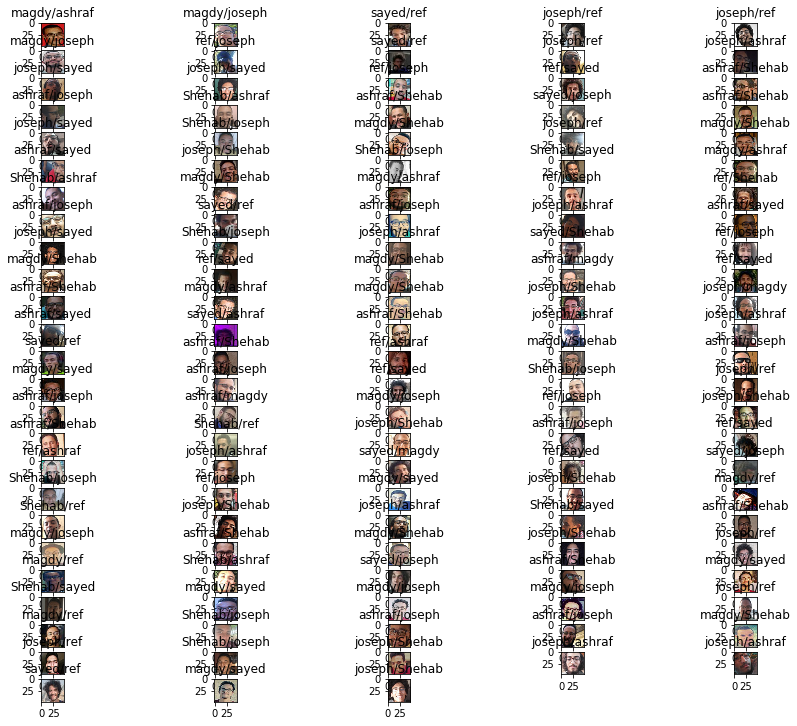

In [13]:
y_hat = model.predict(x_test)
# print(x_test.shape, y_test.shape, y_hat.shape)
cnt = 1
fig = plt.figure(figsize=(15, 15))

for i, j, k in zip(x_test, y_test, y_hat):
    if j[0] != np.where(k == np.max(k))[0][0]:
        fig.add_subplot(30, 5, cnt)
        plt.imshow((i * 255).astype(np.uint8))
        plt.title(str(classes[j[0]]+'/' + classes[np.where(k == np.max(k))[0][0]]))
        # plt.show()
        cnt += 1
print("false:", cnt)
fig.show()


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6912)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               3456500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3006      
Total params: 3,710,006
Trainable params: 3,710,006
Non-trainable params: 0
_________________________________________________________________
